In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from util import display_image

## affine transform

$$x' = x + d_x$$
$$y' = y + d_y$$

$$
\begin{bmatrix}
x'\\
y'
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 & d_x\\
0 & 1 & d_y
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
$$

In [2]:
img = cv.imread('../img/fish.jpg')

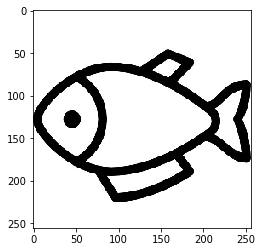

In [3]:
display_image(img)

In [4]:
rows, cols = img.shape[0:2]
print(rows, cols)

256 256


In [5]:
dx = 100
dy = 50

In [6]:
# transformation matrix
mtrx = np.float32([
    [1, 0, dx],
    [0, 1, dy]
])

In [7]:
# simple transformation
dst = cv.warpAffine(img, mtrx, (cols+dx, rows+dy))

In [8]:
# adjsut border with blue color
dst2 = cv.warpAffine(img, mtrx, (cols+dx, rows+dy), None, cv.INTER_LINEAR, cv.BORDER_CONSTANT, (255, 0, 0))

In [9]:
# reflect with original image
dst3 = cv.warpAffine(img, mtrx, (cols+dx, rows+dy), None, cv.INTER_LINEAR, cv.BORDER_REFLECT)

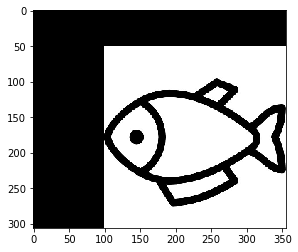

In [10]:
display_image(dst)

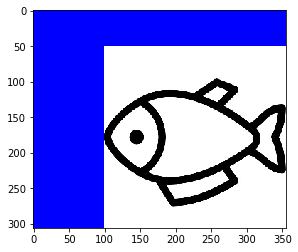

In [11]:
display_image(dst2)

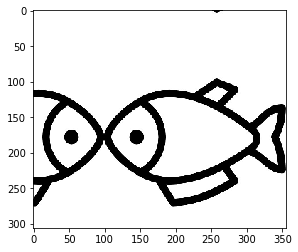

In [12]:
display_image(dst3)

## resize

$$x' = x + d_x$$
$$y' = y + d_y$$

$$
\begin{bmatrix}
x'\\
y'
\end{bmatrix} = 
\begin{bmatrix}
\alpha & 0 & 0\\
0 & \beta & 0
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
$$

In [13]:
img = cv.imread('../img/fish.jpg')

In [14]:
height, width = img.shape[:2]
print(height, width)

256 256


In [15]:
m_small = np.float32([
    [0.5, 0, 0],
    [0, 0.5, 0]
])

m_big = np.float32([
    [2, 0, 0],
    [0, 2, 0]
])

* without interpolation

In [16]:
dst1 = cv.warpAffine(img, m_small, (int(height*0.5), int(width*0.5)))

In [17]:
dst2 = cv.warpAffine(img, m_big, (int(height*2), int(width*2)))

* with interpolation

In [18]:
dst3 = cv.warpAffine(img, m_small, (int(height*0.5), int(width*0.5)), None, cv.INTER_AREA)

In [19]:
dst4 = cv.warpAffine(img, m_big, (int(height*2), int(width*2)), None, cv.INTER_CUBIC)

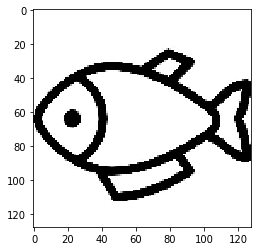

In [20]:
display_image(dst1)

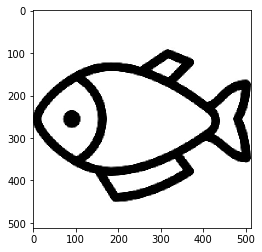

In [21]:
display_image(dst2)

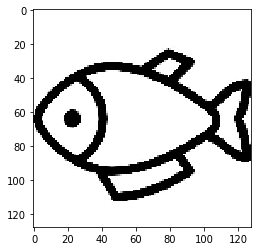

In [22]:
display_image(dst3)

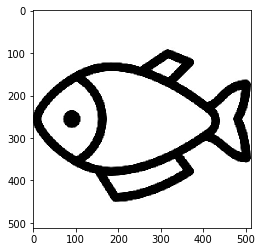

In [23]:
display_image(dst4)

## c.f. cv.resize: does not require transformation matrix

In [24]:
img = cv.imread('../img/fish.jpg')

height, width = img.shape[:2]
print(height, width)

256 256


In [25]:
dst1 = cv.resize(img, (int(height*0.5), int(width*0.5)), interpolation=cv.INTER_AREA)
dst2 = cv.resize(img, None, None, 2, 2, interpolation=cv.INTER_CUBIC)

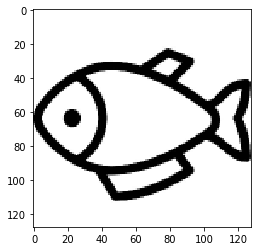

In [26]:
display_image(dst1)

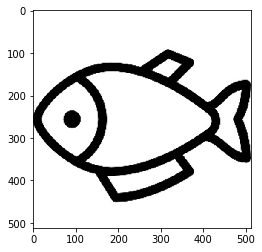

In [27]:
display_image(dst2)

## translation

$$x' = x + d_x$$
$$y' = y + d_y$$

$$
\begin{bmatrix}
x'\\
y'
\end{bmatrix} = 
\begin{bmatrix}
cos\theta & -sin\theta & 0 \\
sin\theta & cos\theta & 0 \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
$$

In [28]:
img = cv.imread('../img/fish.jpg')

rows, cols = img.shape[0:2]
print(rows, cols)

256 256


In [29]:
d45 = 45.0*np.pi / 180
d90 = 90.0*np.pi / 180

* rows//2, -1\*cols//4, rows: considering axis of transformation (too complicated)

In [30]:
m45 = np.float32([
    [np.cos(d45), -1*np.sin(d45), rows//2],
    [np.sin(d45), np.cos(d45), -1*cols//4],
])

m90 = np.float32([
    [np.cos(d90), -1*np.sin(d90), rows],
    [np.sin(d90), np.cos(d90), 0],
])

In [31]:
r45 = cv.warpAffine(img, m45, (cols, rows))
r90 = cv.warpAffine(img, m90, (rows, cols))

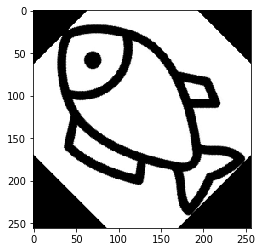

In [32]:
display_image(r45)

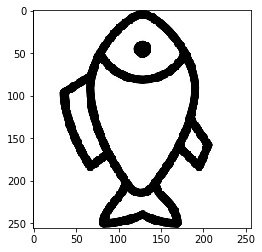

In [33]:
display_image(r90)

## use cv.getRotationMatrix2D

In [34]:
img = cv.imread('../img/fish.jpg')

rows, cols = img.shape[0:2]
print(rows, cols)

256 256


In [35]:
# 0.5, 1.5 means magnification 
m45 = cv.getRotationMatrix2D((cols/2, rows/2), 45, 0.5)
m90 = cv.getRotationMatrix2D((cols/2, rows/2), 90, 1.5)

In [36]:
img45 = cv.warpAffine(img, m45, (cols, rows))
img90 = cv.warpAffine(img, m90, (cols, rows))

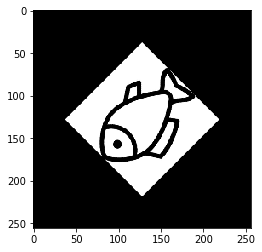

In [37]:
display_image(img45)

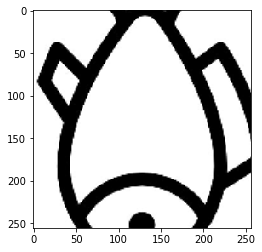

In [38]:
display_image(img90)

## twisting: require at least 3 points

In [39]:
img = cv.imread('../img/fish.jpg')

rows, cols = img.shape[0:2]
print(rows, cols)

256 256


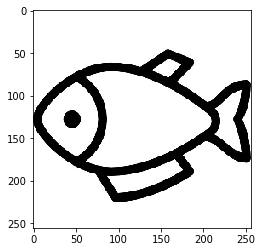

In [40]:
display_image(img)

In [41]:
# coordinate before transformation
pts1 = np.float32([[100, 50], [200, 50], [100, 200]])
# coordinate after transformation
pts2 = np.float32([[80, 70], [210, 60], [250, 120]])

In [42]:
# img, center, radius, color, thickness

# blue
cv.circle(img, (100, 50), 5, (255, 0), -1)
# green
cv.circle(img, (200, 50), 5, (0, 255, 0), -1)
# red
cv.circle(img, (100, 200), 5, (0, 0, 255), -1)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

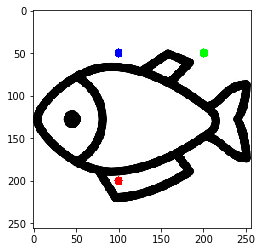

In [43]:
display_image(img)

In [44]:
mtrx = cv.getAffineTransform(pts1, pts2)

In [45]:
dst = cv.warpAffine(img, mtrx, (int(cols*1.5), rows))

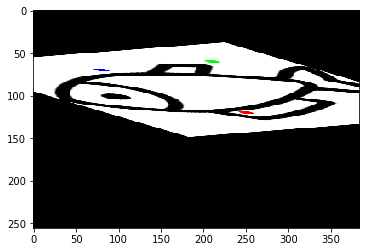

In [46]:
display_image(dst)

## perspective transform: require at least 4 points
* real world: 3-dimensional coordinate
* image: 2-dimensional coordinate
* need operation and system to adjust difference between real world and image
    - use homogeneous coordinates (homography)

In [47]:
img = cv.imread('../img/fish.jpg')

rows, cols = img.shape[0:2]
print(rows, cols)

256 256


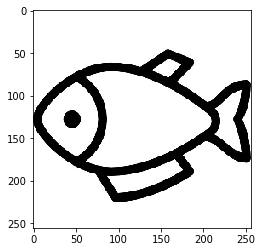

In [48]:
display_image(img)

In [49]:
# coordinate before transformation
pts1 = np.float32([[0, 0], [0, rows], [cols, 0], [cols, rows]])

# coordinate after transformation
pts2 = np.float32([[100, 50], [10, rows-50], [cols-100, 50], [cols-10, rows-50]])

In [50]:
cv.circle(img, (0, 0), 10, (255, 0, 0), -1)
cv.circle(img, (0, rows), 10, (0, 255, 0), -1)
cv.circle(img, (cols, 0), 10, (0, 0, 255), -1)
cv.circle(img, (cols, rows), 10, (0, 255, 255), -1)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]]

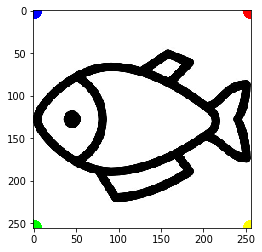

In [51]:
display_image(img)

In [52]:
mtrx = cv.getPerspectiveTransform(pts1, pts2)

In [53]:
dst = cv.warpPerspective(img, mtrx, (cols, rows))

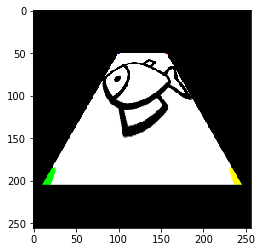

In [54]:
display_image(dst)

## examples about perspective transformation

In [55]:
img = cv.imread('../img/paper.jpg')

In [64]:
img.shape

(782, 586, 3)

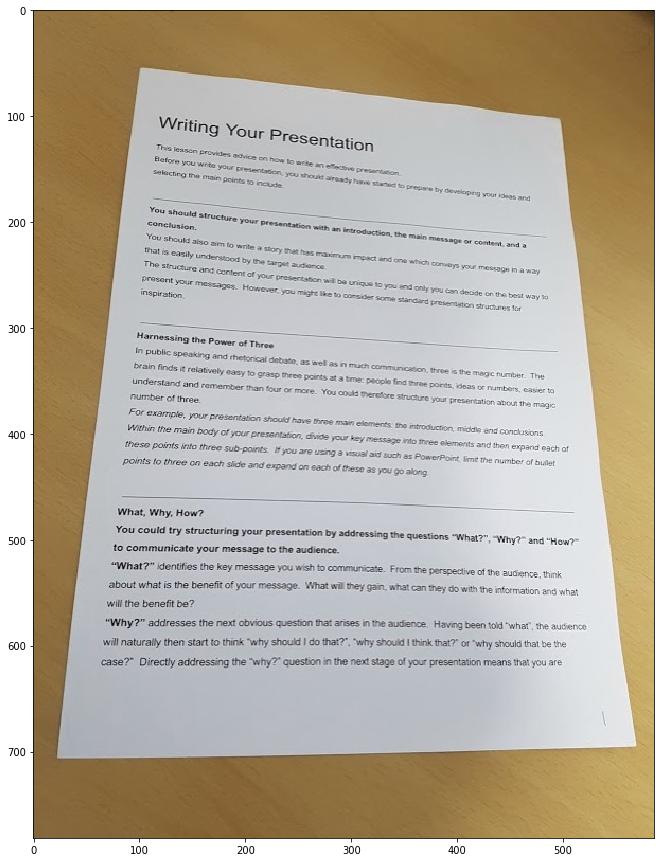

In [58]:
display_image(img, right=3, top=3)

In [93]:
top_left = (100, 53)
top_right = (495, 100)
bottom_left = (20, 705)
bottom_right = (567, 695)

In [94]:
cv.circle(img, top_left, 5, [0, 255, 0], -1)
cv.circle(img, top_right, 5, [0, 255, 0], -1)
cv.circle(img, bottom_left, 5, [0, 255, 0], -1)
cv.circle(img, bottom_right, 5, [0, 255, 0], -1)

array([[[ 69, 116, 148],
        [ 68, 115, 147],
        [ 68, 115, 147],
        ...,
        [ 26,  50,  74],
        [ 25,  49,  71],
        [ 23,  47,  69]],

       [[ 68, 115, 147],
        [ 70, 117, 149],
        [ 70, 117, 149],
        ...,
        [ 30,  54,  78],
        [ 26,  50,  72],
        [ 24,  48,  70]],

       [[ 66, 113, 145],
        [ 70, 117, 149],
        [ 71, 118, 150],
        ...,
        [ 30,  56,  80],
        [ 27,  54,  75],
        [ 25,  52,  73]],

       ...,

       [[ 58, 100, 129],
        [ 58, 100, 129],
        [ 58, 100, 129],
        ...,
        [ 96, 166, 195],
        [103, 173, 202],
        [101, 171, 200]],

       [[ 57,  99, 128],
        [ 57,  99, 128],
        [ 58, 100, 129],
        ...,
        [ 97, 167, 196],
        [103, 173, 202],
        [101, 171, 200]],

       [[ 57,  99, 128],
        [ 57,  99, 128],
        [ 57,  99, 128],
        ...,
        [102, 172, 201],
        [ 99, 169, 198],
        [ 97, 167, 196]]

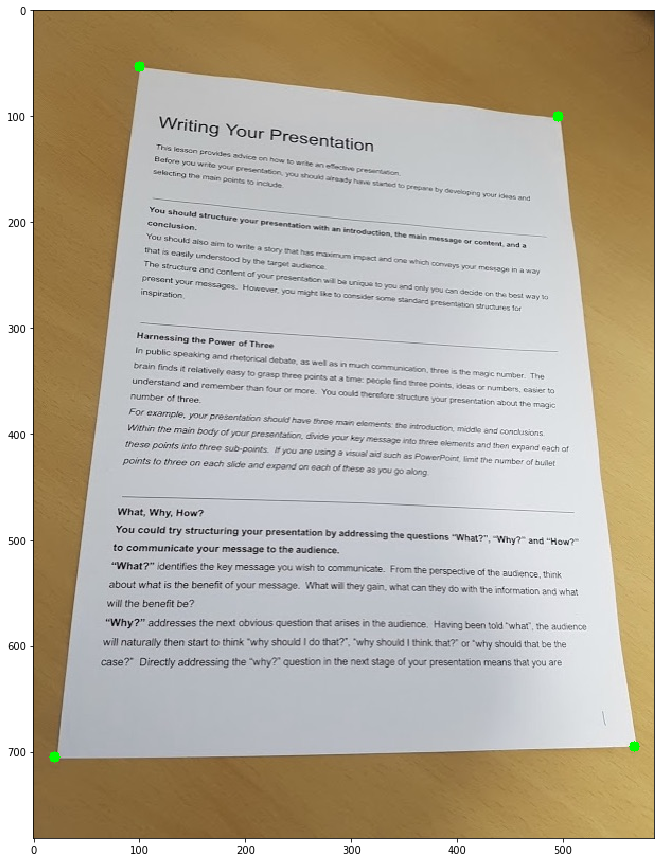

In [97]:
display_image(img, right=3, top=3)

In [99]:
pts1 = np.float32([top_left, top_right, bottom_left, bottom_right])

In [113]:
width = max(abs(top_left[0] - top_right[0]), abs(bottom_left[0] - bottom_right[0]))
height = max(abs(top_left[1] - bottom_left[1]), abs(top_right[1] - bottom_right[1]))

In [114]:
pts2 = np.float32([[0, 0], [width-1, 0], [0, height-1], [width-1, height-1]])

In [115]:
mtrx = cv.getPerspectiveTransform(pts1, pts2)

In [116]:
result = cv.warpPerspective(img, mtrx, (width, height))

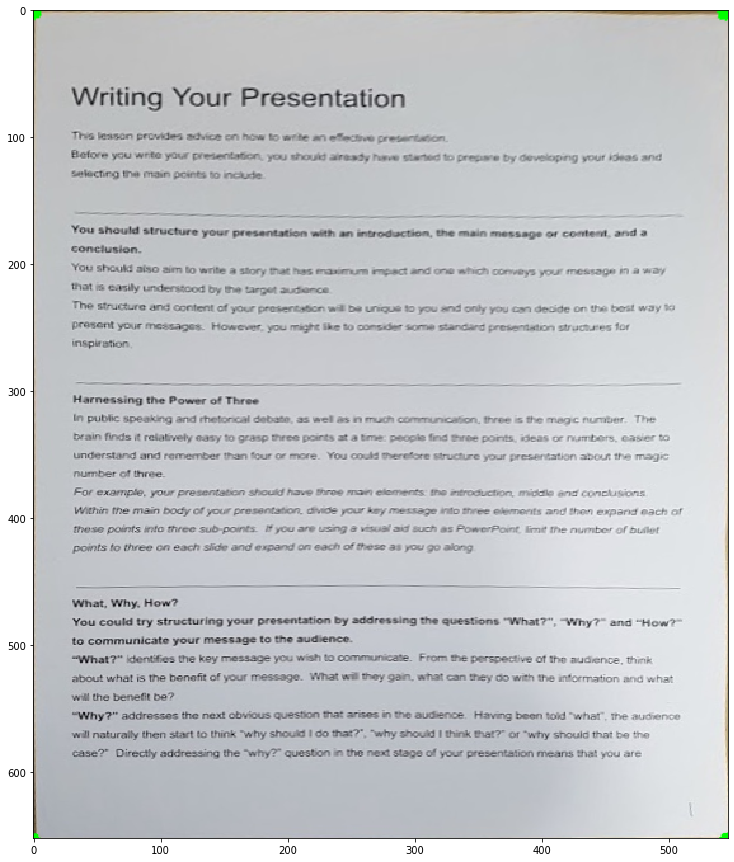

In [117]:
display_image(result, right=3, top=3)

* how to automatically determine range of the paper (green point)
    - see chapter 7